In [1]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
df = pd.read_csv('house_price_mumbai.csv')
df

,BHK,project,Location,City,Total sqft,price_sqft,price
0,3 BHK Apartment,SHREE KRISHNA SangamChembur,Chembur,Mumbai,984,"31,000",3.05 Cr
1,2 BHK Apartment,Ekdanta 24 KaratKurla,Kurla,Mumbai,598,"23,913",1.42 Cr
2,2 BHK Apartment,Liberty Bay VueMalad West,Malad West,Mumbai,738,"21,000",1.54 Cr
3,3 BHK Apartment,Thalia Vrindavan FloraRasayani,Rasayani,Mumbai,644,"10,676",68.75 L
4,2 BHK Apartment,Mayfair The ViewVikhroli,Vikhroli,Mumbai,582,"24,914",1.45 Cr
...,...,...,...,...,...,...,...
3975,2 BHK Apartment,Global Prestige Wing EVasai,Vasai,Mumbai,966,"4,968",48 L
3976,1 BHK Apartment,Unicorn Unicorn Global ArenaNaigaon East,Naigaon East,Mumbai,500,"5,200",26 L
3977,1 BHK Apartment,Navkar Navkar CityNaigaon East,Naigaon East,Mumbai,610,"5,573",34 L
3978,1 BHK Apartment,Navkar City Phase I Part 3Naigaon East,Naigaon East,Mumbai,610,"5,245",32 L


In [3]:
le_BHK = LabelEncoder()
le_project = LabelEncoder()
le_location = LabelEncoder()

In [5]:
df['BHK_n'] = le_BHK.fit_transform(df['BHK'])
df['project_n'] = le_project.fit_transform(df['project'])
df['location_n'] = le_location.fit_transform(df['Location'])

In [6]:
df

,BHK,project,Location,City,Total sqft,price_sqft,price,BHK_n,project_n,location_n
0,3 BHK Apartment,SHREE KRISHNA SangamChembur,Chembur,Mumbai,984,"31,000",3.05 Cr,10,732,28
1,2 BHK Apartment,Ekdanta 24 KaratKurla,Kurla,Mumbai,598,"23,913",1.42 Cr,5,138,86
2,2 BHK Apartment,Liberty Bay VueMalad West,Malad West,Mumbai,738,"21,000",1.54 Cr,5,295,94
3,3 BHK Apartment,Thalia Vrindavan FloraRasayani,Rasayani,Mumbai,644,"10,676",68.75 L,10,901,127
4,2 BHK Apartment,Mayfair The ViewVikhroli,Vikhroli,Mumbai,582,"24,914",1.45 Cr,5,365,161
...,...,...,...,...,...,...,...,...,...,...
3975,2 BHK Apartment,Global Prestige Wing EVasai,Vasai,Mumbai,966,"4,968",48 L,5,163,154
3976,1 BHK Apartment,Unicorn Unicorn Global ArenaNaigaon East,Naigaon East,Mumbai,500,"5,200",26 L,1,920,105
3977,1 BHK Apartment,Navkar Navkar CityNaigaon East,Naigaon East,Mumbai,610,"5,573",34 L,1,395,105
3978,1 BHK Apartment,Navkar City Phase I Part 3Naigaon East,Naigaon East,Mumbai,610,"5,245",32 L,1,392,105


In [7]:
def convert_price(value):
    value = value.replace(',', '')  # Remove commas
    if 'Cr' in value:
        return float(value.replace(' Cr', '')) * 10**7
    elif 'L' in value:
        return float(value.replace(' L', '')) * 10**5
#     elif 'Million' in value:
#         return float(value.replace(' Million', '')) * 10**6
    else:
        return float(value)

# Apply the conversion function to the price column
df['price'] = df['price'].apply(convert_price)
df['price_sqft'] = df['price_sqft'].apply(convert_price)
df['Total sqft'] = df['Total sqft'].astype(float)

# Display the cleaned DataFrame
df

,BHK,project,Location,City,Total sqft,price_sqft,price,BHK_n,project_n,location_n
0,3 BHK Apartment,SHREE KRISHNA SangamChembur,Chembur,Mumbai,984.0,31000.0,30500000.0,10,732,28
1,2 BHK Apartment,Ekdanta 24 KaratKurla,Kurla,Mumbai,598.0,23913.0,14200000.0,5,138,86
2,2 BHK Apartment,Liberty Bay VueMalad West,Malad West,Mumbai,738.0,21000.0,15400000.0,5,295,94
3,3 BHK Apartment,Thalia Vrindavan FloraRasayani,Rasayani,Mumbai,644.0,10676.0,6875000.0,10,901,127
4,2 BHK Apartment,Mayfair The ViewVikhroli,Vikhroli,Mumbai,582.0,24914.0,14500000.0,5,365,161
...,...,...,...,...,...,...,...,...,...,...
3975,2 BHK Apartment,Global Prestige Wing EVasai,Vasai,Mumbai,966.0,4968.0,4800000.0,5,163,154
3976,1 BHK Apartment,Unicorn Unicorn Global ArenaNaigaon East,Naigaon East,Mumbai,500.0,5200.0,2600000.0,1,920,105
3977,1 BHK Apartment,Navkar Navkar CityNaigaon East,Naigaon East,Mumbai,610.0,5573.0,3400000.0,1,395,105
3978,1 BHK Apartment,Navkar City Phase I Part 3Naigaon East,Naigaon East,Mumbai,610.0,5245.0,3200000.0,1,392,105


In [8]:
df = df.drop(['project', 'BHK', 'Location', 'City'], axis='columns')
df

,Total sqft,price_sqft,price,BHK_n,project_n,location_n
0,984.0,31000.0,30500000.0,10,732,28
1,598.0,23913.0,14200000.0,5,138,86
2,738.0,21000.0,15400000.0,5,295,94
3,644.0,10676.0,6875000.0,10,901,127
4,582.0,24914.0,14500000.0,5,365,161
...,...,...,...,...,...,...
3975,966.0,4968.0,4800000.0,5,163,154
3976,500.0,5200.0,2600000.0,1,920,105
3977,610.0,5573.0,3400000.0,1,395,105
3978,610.0,5245.0,3200000.0,1,392,105


In [9]:
df.describe()

,Total sqft,price_sqft,price,BHK_n,project_n,location_n
count,3980.000000,3980.000000,3.980000e+03,3980.000000,3980.000000,3980.000000
mean,895.417588,11938.309799,1.122412e+07,4.578141,583.916583,72.766583
std,688.831332,10154.348760,1.708743e+07,4.977120,316.768013,51.360368
min,127.000000,114.000000,1.250000e+05,0.000000,0.000000,0.000000
25%,590.000000,4818.500000,2.829500e+06,1.000000,302.000000,22.000000
50%,717.000000,9000.000000,6.400000e+06,4.000000,683.000000,71.000000
75%,1060.000000,16172.750000,1.330000e+07,5.000000,920.000000,105.000000
max,16000.000000,92592.000000,3.000000e+08,22.000000,967.000000,173.000000


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3980 entries, 0 to 3979
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Total sqft  3980 non-null   float64
 1   price_sqft  3980 non-null   float64
 2   price       3980 non-null   float64
 3   BHK_n       3980 non-null   int32  
 4   project_n   3980 non-null   int32  
 5   location_n  3980 non-null   int32  
dtypes: float64(3), int32(3)
memory usage: 140.1 KB


In [11]:
print(df.isnull().sum())

Total sqft    0
price_sqft    0
price         0
BHK_n         0
project_n     0
location_n    0
dtype: int64


In [15]:
X = df.drop(['price'], axis='columns')
y = df['price']

In [16]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [17]:
# Linear Regression
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
y_pred_lin = lin_reg.predict(X_test)

# Evaluate Linear Regression
mse_lin = mean_squared_error(y_test, y_pred_lin)
r2_lin = r2_score(y_test, y_pred_lin)
print("Linear Regression MSE:", mse_lin)
print("Linear Regression R2:", r2_lin)

Linear Regression MSE: 61707663179553.2
Linear Regression R2: 0.7304763289411867


In [18]:
# Lasso Regression
lasso_reg = Lasso(alpha=0.1)  # You can tune the alpha parameter
lasso_reg.fit(X_train, y_train)
y_pred_lasso = lasso_reg.predict(X_test)

# Evaluate Lasso Regression
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
r2_lasso = r2_score(y_test, y_pred_lasso)
print("Lasso Regression MSE:", mse_lasso)
print("Lasso Regression R2:", r2_lasso)

Lasso Regression MSE: 61707663149937.55
Lasso Regression R2: 0.7304763290705405


In [19]:
# Ridge Regression
ridge_reg = Ridge(alpha=1.0)  # You can tune the alpha parameter
ridge_reg.fit(X_train, y_train)
y_pred_ridge = ridge_reg.predict(X_test)

# Evaluate Ridge Regression
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)
print("Ridge Regression MSE:", mse_ridge)
print("Ridge Regression R2:", r2_ridge)

Ridge Regression MSE: 61707630900644.73
Ridge Regression R2: 0.7304764699274024


In [20]:
# Decision Tree Regression
tree_reg = DecisionTreeRegressor(random_state=42)
tree_reg.fit(X_train, y_train)
y_pred_tree = tree_reg.predict(X_test)

# Evaluate Decision Tree Regression
mse_tree = mean_squared_error(y_test, y_pred_tree)
r2_tree = r2_score(y_test, y_pred_tree)
print("Decision Tree Regression MSE:", mse_tree)
print("Decision Tree Regression R2:", r2_tree)

Decision Tree Regression MSE: 7234711711055.276
Decision Tree Regression R2: 0.9684005849688064


In [21]:
# Define a function to evaluate and print metrics
def evaluate_model(model, X_test, y_test, model_name):
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f"{model_name} MSE: {mse:.4f}")
    print(f"{model_name} R2: {r2:.4f}")
    return mse, r2

# Linear Regression
mse_lin, r2_lin = evaluate_model(lin_reg, X_test, y_test, "Linear Regression")

# Lasso Regression
mse_lasso, r2_lasso = evaluate_model(lasso_reg, X_test, y_test, "Lasso Regression")

# Ridge Regression
mse_ridge, r2_ridge = evaluate_model(ridge_reg, X_test, y_test, "Ridge Regression")

# Decision Tree Regression
mse_tree, r2_tree = evaluate_model(tree_reg, X_test, y_test, "Decision Tree Regression")

Linear Regression MSE: 61707663179553.2031
Linear Regression R2: 0.7305
Lasso Regression MSE: 61707663149937.5469
Lasso Regression R2: 0.7305
Ridge Regression MSE: 61707630900644.7266
Ridge Regression R2: 0.7305
Decision Tree Regression MSE: 7234711711055.2764
Decision Tree Regression R2: 0.9684


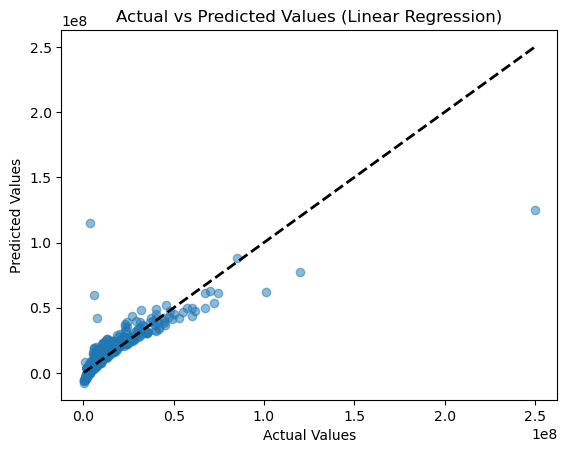

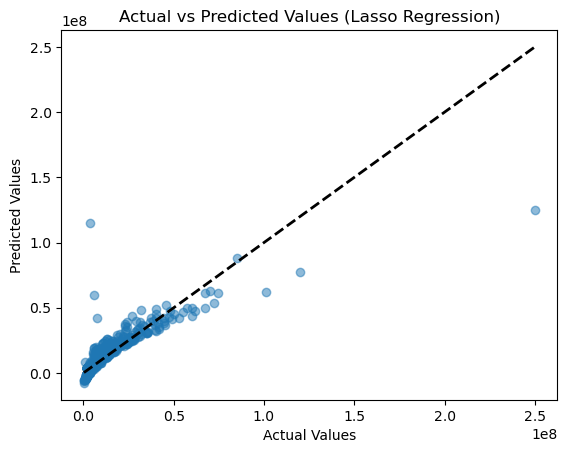

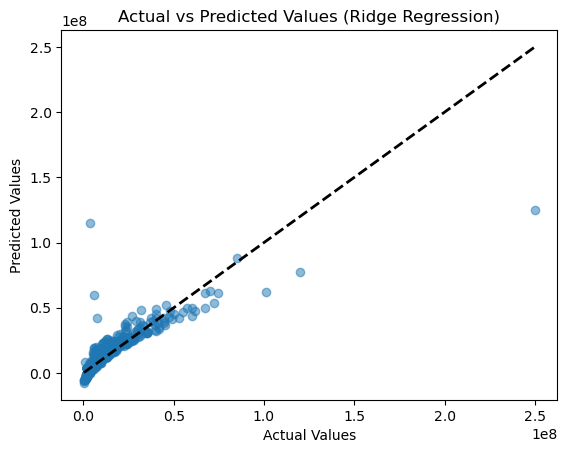

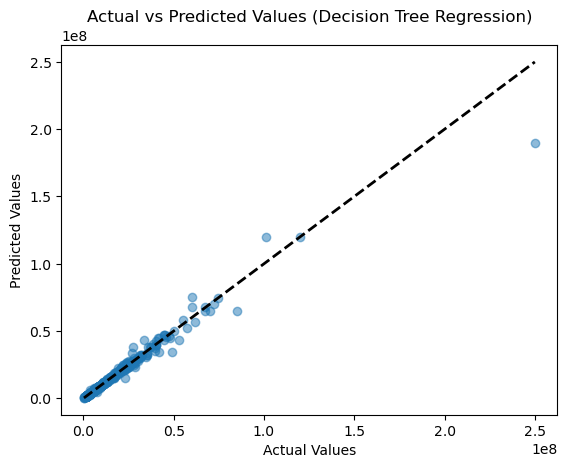

In [22]:
import matplotlib.pyplot as plt

# Function to plot actual vs predicted values
def plot_predictions(y_test, y_pred, model_name):
    plt.scatter(y_test, y_pred, alpha=0.5)
    plt.xlabel("Actual Values")
    plt.ylabel("Predicted Values")
    plt.title(f"Actual vs Predicted Values ({model_name})")
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
    plt.show()

# Plot predictions for each model
plot_predictions(y_test, lin_reg.predict(X_test), "Linear Regression")
plot_predictions(y_test, lasso_reg.predict(X_test), "Lasso Regression")
plot_predictions(y_test, ridge_reg.predict(X_test), "Ridge Regression")
plot_predictions(y_test, tree_reg.predict(X_test), "Decision Tree Regression")

In [23]:
# Function to print coefficients
def print_coefficients(model, model_name):
    print(f"{model_name} Coefficients:")
    for feature, coef in zip(X.columns, model.coef_):
        print(f"{feature}: {coef:.4f}")
    print()

# Print coefficients for Linear Regression
print_coefficients(lin_reg, "Linear Regression")

# Print coefficients for Lasso Regression
print_coefficients(lasso_reg, "Lasso Regression")

# Print coefficients for Ridge Regression
print_coefficients(ridge_reg, "Ridge Regression")

Linear Regression Coefficients:
Total sqft: 13536.6958
price_sqft: 1142.8861
BHK_n: -344017.3342
project_n: 319.2448
location_n: 1619.8967

Lasso Regression Coefficients:
Total sqft: 13536.6958
price_sqft: 1142.8861
BHK_n: -344017.3283
project_n: 319.2448
location_n: 1619.8968

Ridge Regression Coefficients:
Total sqft: 13536.6721
price_sqft: 1142.8860
BHK_n: -344010.9146
project_n: 319.2511
location_n: 1619.9731



In [24]:
# Summary of the models' performance
models = ['Linear Regression', 'Lasso Regression', 'Ridge Regression', 'Decision Tree Regression']
mse_values = [mse_lin, mse_lasso, mse_ridge, mse_tree]
r2_values = [r2_lin, r2_lasso, r2_ridge, r2_tree]

summary_df = pd.DataFrame({
    'Model': models,
    'MSE': mse_values,
    'R2': r2_values
})

print(summary_df)

                      Model           MSE        R2
0         Linear Regression  6.170766e+13  0.730476
1          Lasso Regression  6.170766e+13  0.730476
2          Ridge Regression  6.170763e+13  0.730476
3  Decision Tree Regression  7.234712e+12  0.968401
